# WeatherPy

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy
from datetime import datetime

# Generate Cities List

In [147]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [148]:
lat_lngs = []
cities = []

In [109]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [110]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

560

In [111]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="
response=requests.get(query_url).json()


In [112]:
#cities=
date=[]
country=[]
city_name=[]
lat=[]
lon=[]
temp=[] 
cloud=[]
humidity=[]
w_speed=[]

for city in cities:
    try:
        response=requests.get(query_url+city).json()
        #print(response)
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]['all'])
        humidity.append(response["main"]["humidity"])
        w_speed.append(response["wind"]["speed"])
       
    except Exception:
        print("City not found. Skipping...")

        

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [113]:
weather_df.count()

Date          538
Country       538
City          538
Lat           538
Lon           538
Max Tem       538
Cloudiness    538
Humidity      538
Wind Speed    538
dtype: int64

In [114]:
weather_df=pd.DataFrame({"Date":date,
                         "Country":country,
                         "City":city_name,
                         "Lat":lat,
                         "Lon":lon,
                         "Max Tem":temp,
                         "Cloudiness":cloud,
                         "Humidity":humidity,
                         "Wind Speed":w_speed})

In [115]:
weather_df

,Date,Country,City,Lat,Lon,Max Tem,Cloudiness,Humidity,Wind Speed
0,1586476279,CK,Avarua,-21.21,-159.78,86.00,99,89,12.75
1,1586476276,PF,Rikitea,-23.12,-134.97,76.60,100,68,8.63
2,1586476490,AU,Kununurra,-15.77,128.73,75.20,75,73,13.87
3,1586476490,US,Sitka,57.05,-135.33,44.60,75,56,5.82
4,1586476490,NZ,Tuatapere,-46.13,167.68,59.00,42,79,8.01
...,...,...,...,...,...,...,...,...,...
507,1586476535,JP,Nemuro,43.32,145.57,32.00,75,95,1.12
508,1586476535,CN,Wanning,18.80,110.40,75.87,93,83,6.42
509,1586476535,FI,Lappeenranta,61.06,28.19,34.00,24,69,5.82
510,1586476535,ES,Los Llanos de Aridane,28.66,-17.92,69.80,90,77,6.93


In [88]:
pd.to_datetime(weather_df['Date'],unit='s')

0     2020-04-09 22:58:06
1     2020-04-09 22:58:06
2     2020-04-09 22:58:06
3     2020-04-09 22:58:06
4     2020-04-09 22:58:06
              ...        
533   2020-04-09 22:59:04
534   2020-04-09 22:59:04
535   2020-04-09 22:59:04
536   2020-04-09 22:58:06
537   2020-04-09 22:55:42
Name: Date, Length: 538, dtype: datetime64[ns]

# Latitude vs. Temperature Plot

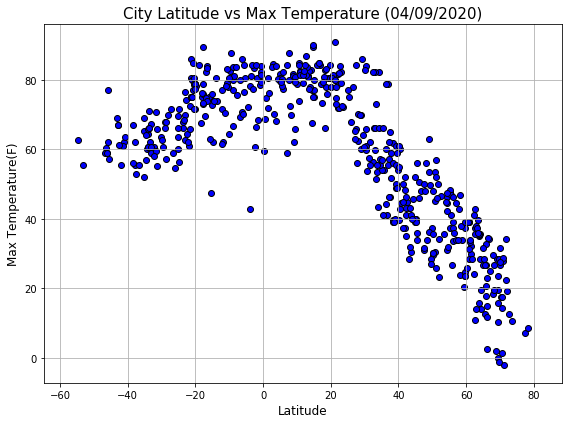

In [118]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Max Tem"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Max Temperature(F)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Max Temperature ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Max Tem"])-5,max(weather_df["Max Tem"])+5)
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Humidity Plot

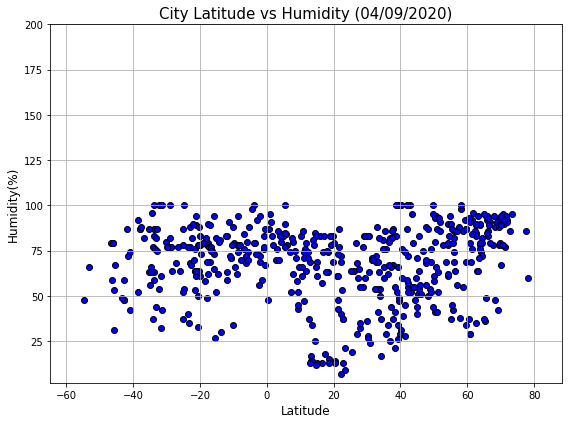

In [132]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Humidity"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Humidity(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Humidity ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Humidity"])-5,max(weather_df["Humidity"])+100)
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Cloudiness Plot

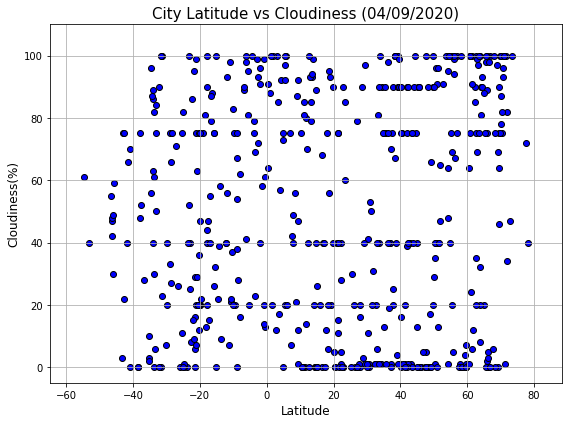

In [133]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Cloudiness"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Cloudiness(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Cloudiness ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Cloudiness"]-5),max(weather_df["Cloudiness"]+10))
plt.grid()
plt.tight_layout()
plt.show()

#  Latitude vs. Wind Speed Plot

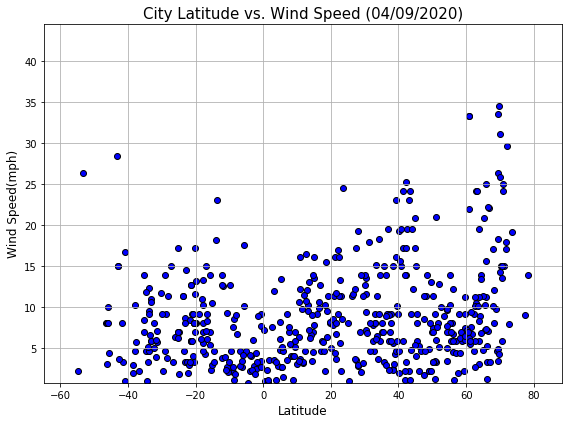

In [135]:
current_d=datetime.now().strftime("%m/%d/%Y")
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind Speed"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Wind Speed(mph)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Wind Speed ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Wind Speed"]),max(weather_df["Wind Speed"]+10))
plt.grid()
plt.tight_layout()
plt.show()

# Linear Regression

In [150]:
s_hem=weather_df[weather_df["Lat"]<0]
n_hem=weather_df[weather_df["Lat"]>=0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [227]:
def line_reg(x_axis,y_axis,name_ylabel,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,6))
    plt.scatter(x_axis,y_axis, marker="o", color="blue",edgecolor="black")
    plt.ylabel(name_ylabel,fontSize=11)
    plt.xlabel('Latitude',fontSize=11)
    plt.title(title,fontSize=12)
    plt.xticks(fontSize=10)
    plt.yticks(fontSize=10)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(min(x_axis),min(y_axis)),fontsize=15,color="red")
    plt.grid()
    plt.show()

The r-squared is: -0.9048413649528757


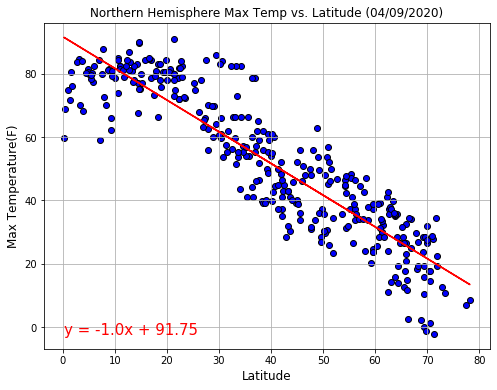

In [226]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Northern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6109257242851475


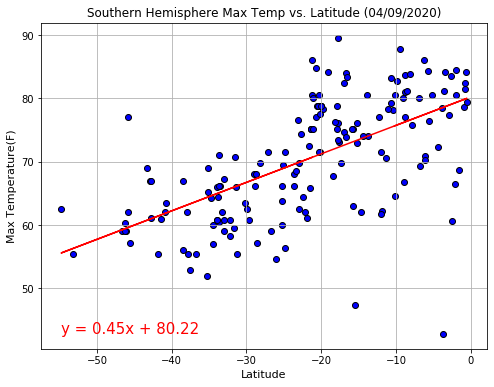

In [228]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Southern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2762370228572886


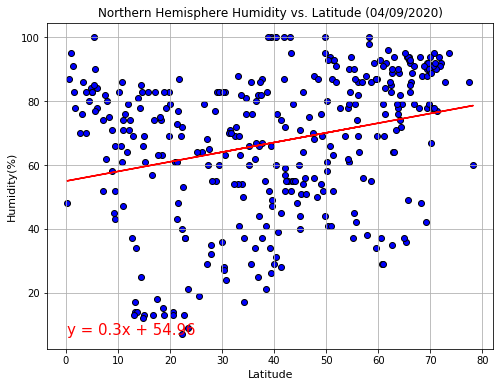

In [230]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Northern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18460657228316515


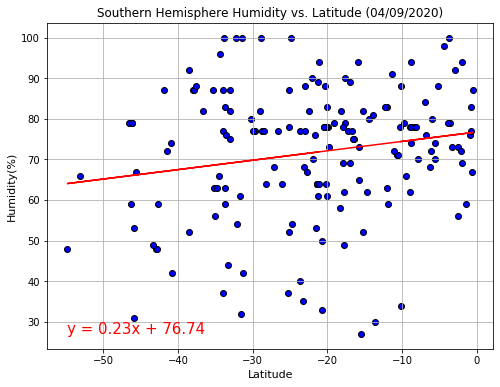

In [232]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Southern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

 #### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1522926305675195


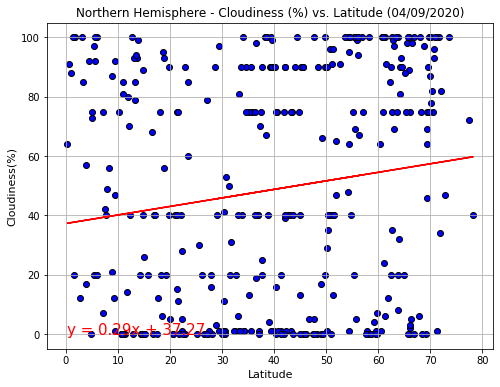

In [233]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15185051525641638


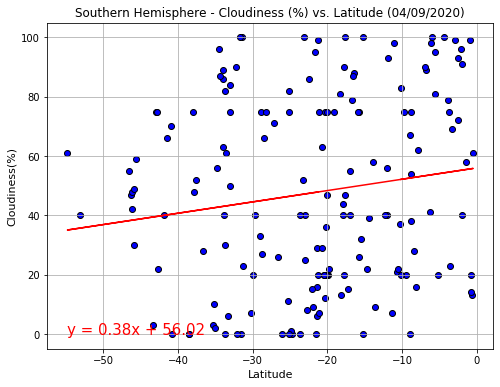

In [234]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2786244617272214


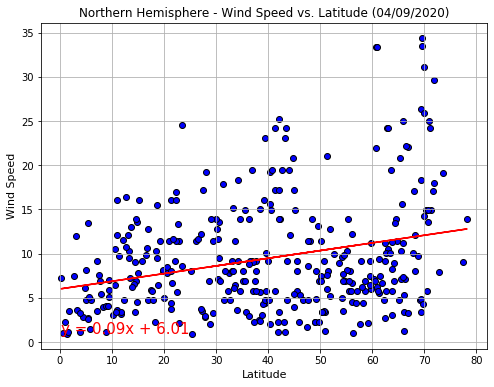

In [235]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Northern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2155144108786547


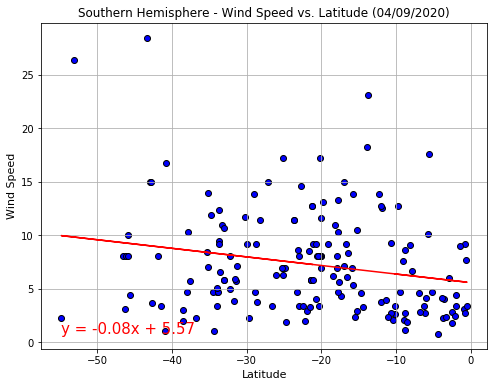

In [236]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Southern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)